# Data Mining Project Group X <img align='right' width='100' height='125' src='https://maiseducativa.com/wp-content/uploads/2015/02/Logo_Nova-IMS.jpg'>





### Group Members:

Daniel Franco - <br>
João Malho - 20220696<br>
Karim Miladi - 

***

# __Introdution__
***
## Business Situation

A2Z Insurance (A2Z) is a portuguese long standing insurance company that
serves a wide array of insurance services: Motor, Household, Health, Life and
Work Compensation. Although A2Z primarily serves portuguese customers, a
significant portion of their customer acquisition comes from their web site.
Customers can sign up to A2Z services through their branches, by telephone, or
on the web site.

In 2016, A2Z became one of the largest insurers in Portugal. However, the lack
of a data driven culture in the company ultimately led to poorly maintained
databases over the years. A2Z is trying to make better use of the database it
has regarding its customers. So far, it has simply mass-marketed everything.
All potential and existing customers get the same promotions, and there are no
attempts to identify target markets for cross-selling opportunities. Now, A2Z
wants start differentiating customers, and developing more focused programs.

A2Z provided you an ABT (Analytic Based Table) with data regarding a sample of
10.290 Customers from its active database. These are customers that had at
least one insurance service with the company at the time the dataset was
extracted. Your job is to segment the database and find the relevant clusters
of customers. To do this, we suggest you segment the customers using different
perspectives and approaches, as well as combine and analyze the results. A2Z
would like to understand the value and demographics of each customer segment,
as well as understand which types of insurance they will be more interested in

## Metadata

| Variable 		      | Description                              | Additional Information |
|---------------------|------------------------------------------|------------------------|
| ID 		          | ID 		                                 |                        |
| First Policy 		  | Year of the customer’s first policy      | (1)                    |
| Birthday            | Customer’s Birthday Year                 | (2)                    |
| Education           | Academic Degree                          |                        |
| Salary              | Gross monthly salary (€) 		         |                        |
| Area 		          | Living area 		                     | (3)                    |
| Children 		      | Binary variable (Y=1) 		             |                        |
| CMV 		          | Customer Monetary Value 		         | (4)                    |
| Claims 		      | Claims Rate 		                     | (5)                    |
| Motor 		      | Premiums (€) in LOB: Motor 		         | (6)                    |
| Household 		  | Premiums (€) in LOB: Household 		     | (6)                    |
| Health 		      | Premiums (€) in LOB: Health 		     | (6)                    |
| Life 		          | Premiums (€) in LOB: Life 		         | (6)                    |
| Work Compensation   | Premiums (€) in LOB: Work Compensations  | (6)                    |

## Additional Information

1. May be considered as the first year as a customer
2. The current year of the database is 2016
3. No further information provided about the meaning of the area codes
4. Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost)
5. Amount paid by the insurance company (€)/ Premiums (€) Note: in the last 2 years
6. Annual Premiums (2016). Negative premiums may manifest reversals occurred in the current year, paid in previous one(s).

Notice the data was stored in a SAS database file. There may be some intricacies when
reading this file type using Python. Make sure the data is being
imported properly and that you remove (before or after converting it to a
pandas data frame) any irrelevant rows/columns you may find.

## Expected outcomes

1. Explore the data and identify the variables that should be used to segment customers.
2. Identify customer segments
3. Justify the number of clusters you chose (taking in consideration the business use as well).
4. Explain the clusters found.
5. Suggest business applications for the findings and define general marketing
   approaches for each cluster.

**Note:** Invest time into evaluating your preprocessing pipeling, thinking
how you want to do your clustering, possible approaches, and advantages or
disadvantages of different decisions.

***

# Preprocessing
***
## Imports

In [1]:
%autosave 90

import pyreadstat
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
#import bitches 
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

Autosaving every 90 seconds


## Reading the SAS File

In [2]:
df,meta = pyreadstat.read_sas7bdat('a2z_insurance.sas7bdat')

In [3]:
type(df)

pandas.core.frame.DataFrame

## 1 Initial Analysis

In [6]:
df

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,10292.0,1984.0,1949.0,4 - PhD,3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10292,10293.0,1977.0,1952.0,1 - Basic,2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10293,10294.0,1994.0,1976.0,3 - BSc/MSc,2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,1977.0,1 - Basic,1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [7]:
df=df.set_index('CustID')

In [8]:
df

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1.0,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2.0,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3.0,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4.0,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5.0,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292.0,1984.0,1949.0,4 - PhD,3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10293.0,1977.0,1952.0,1 - Basic,2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10294.0,1994.0,1976.0,3 - BSc/MSc,2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10296 entries, 1.0 to 10296.0
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstPolYear   10266 non-null  float64
 1   BirthYear      10279 non-null  float64
 2   EducDeg        10296 non-null  object 
 3   MonthSal       10260 non-null  float64
 4   GeoLivArea     10295 non-null  float64
 5   Children       10275 non-null  float64
 6   CustMonVal     10296 non-null  float64
 7   ClaimsRate     10296 non-null  float64
 8   PremMotor      10262 non-null  float64
 9   PremHousehold  10296 non-null  float64
 10  PremHealth     10253 non-null  float64
 11  PremLife       10192 non-null  float64
 12  PremWork       10210 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [9]:
non_metric_features = ["EducDeg"]
metric_features = df.columns.drop(non_metric_features).to_list()

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FirstPolYear,10266.0,1991.062634,511.267913,1974.00,1980.00,1986.00,1992.0000,53784.00
BirthYear,10279.0,1968.007783,19.709476,1028.00,1953.00,1968.00,1983.0000,2001.00
MonthSal,10260.0,2506.667057,1157.449634,333.00,1706.00,2501.50,3290.2500,55215.00
GeoLivArea,10295.0,2.709859,1.266291,1.00,1.00,3.00,4.0000,4.00
Children,10275.0,0.706764,0.455268,0.00,0.00,1.00,1.0000,1.00
CustMonVal,10296.0,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,0.742772,2.916964,0.00,0.39,0.72,0.9800,256.20
PremMotor,10262.0,300.470252,211.914997,-4.11,190.59,298.61,408.3000,11604.42
PremHousehold,10296.0,210.431192,352.595984,-75.00,49.45,132.80,290.0500,25048.80
PremHealth,10253.0,171.580833,296.405976,-2.11,111.80,162.81,219.8200,28272.00


In [11]:
df.describe(include='O').T

,count,unique,top,freq
EducDeg,10296,5,3 - BSc/MSc,4799


In [12]:
df['EducDeg'].value_counts()

3 - BSc/MSc        4799
2 - High School    3510
1 - Basic          1272
4 - PhD             698
                     17
Name: EducDeg, dtype: int64

## 2 Data Preparation

#### 2.1 Duplicates

In [13]:
#Check duplicates in CustID
df.reset_index().duplicated('CustID').sum()

0

#### 2.2 Missing Values

In [14]:
# Missing values reporter function
def missing_value_reporter(data, threshold=None):
    '''
    Returns pandas dataframe with feature's missing values count in absolute and relative frequency
    after a threshold is parsed (max % of column missing values), so it'll tell if the features are 
    above or bellow the desired missing threshold limit (True for above or False for bellow).
    
    If the threshold is not provided, it defaults to None.
     Args:
        data - input for data
        threshold - input for threshold variable from 0 to 1
        
    '''
    na_count = data.isna().sum() 
    na_count = na_count[na_count > 0]
    na_abs_frq = na_count.values
    na_rel_frq = round(na_count/len(data),2)
    missings = pd.DataFrame({'Feature': na_count.index, 'Nº of missings': na_abs_frq, '% of missings': na_rel_frq})
    missings = missings.sort_values(by = 'Nº of missings', ascending = False)
    
    if threshold:
        missings['Above threshold'] = [True if x > threshold else False for x in missings['% of missings']]
        
    return missings

In [15]:
missing_value_reporter(data=df, threshold=0.1)

,Feature,Nº of missings,% of missings,Above threshold
PremLife,PremLife,104,0.01,False
PremWork,PremWork,86,0.01,False
PremHealth,PremHealth,43,0.00,False
MonthSal,MonthSal,36,0.00,False
PremMotor,PremMotor,34,0.00,False
FirstPolYear,FirstPolYear,30,0.00,False
Children,Children,21,0.00,False
BirthYear,BirthYear,17,0.00,False
GeoLivArea,GeoLivArea,1,0.00,False


In [16]:
#Treating missing values using neighbours
df_neighbors = df.copy()

nans_index = df_neighbors.isna().any(axis=1)
df_neighbors[nans_index]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
22.0,1977.0,1958.0,2 - High School,NaN,3.0,1.0,111.37,0.80,407.52,111.70,100.13,24.67,30.34
69.0,1983.0,1977.0,2 - High School,1399.0,4.0,1.0,476.65,0.33,330.73,186.70,211.15,NaN,15.78
139.0,1979.0,1976.0,2 - High School,2538.0,2.0,1.0,149.59,0.69,194.26,305.60,NaN,37.34,17.67
144.0,1996.0,1990.0,3 - BSc/MSc,NaN,4.0,1.0,-42.45,1.02,146.36,353.95,220.04,121.80,42.01
185.0,1993.0,1984.0,2 - High School,2419.0,4.0,1.0,-62.23,1.07,NaN,253.95,230.60,5.89,43.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10011.0,NaN,1947.0,2 - High School,3959.0,2.0,NaN,-128.24,1.14,177.81,153.35,311.28,67.79,35.45
10058.0,1983.0,1980.0,2 - High School,1569.0,4.0,1.0,222.60,0.55,235.60,211.15,NaN,32.34,68.79
10143.0,1986.0,1985.0,3 - BSc/MSc,1652.0,3.0,1.0,55.67,0.88,257.05,94.45,308.39,NaN,13.78


In [17]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_neighbors[metric_features] = imputer.fit_transform(df_neighbors[metric_features])

df_neighbors.loc[nans_index, metric_features]

,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,
22.0,1977.0,1958.0,2541.2,3.0,1.0,111.37,0.80,407.520,111.70,100.130,24.670,30.340
69.0,1983.0,1977.0,1399.0,4.0,1.0,476.65,0.33,330.730,186.70,211.150,33.784,15.780
139.0,1979.0,1976.0,2538.0,2.0,1.0,149.59,0.69,194.260,305.60,226.598,37.340,17.670
144.0,1996.0,1990.0,1721.8,4.0,1.0,-42.45,1.02,146.360,353.95,220.040,121.800,42.010
185.0,1993.0,1984.0,2419.0,4.0,1.0,-62.23,1.07,264.428,253.95,230.600,5.890,43.120
...,...,...,...,...,...,...,...,...,...,...,...,...
10011.0,1990.8,1947.0,3959.0,2.0,0.0,-128.24,1.14,177.810,153.35,311.280,67.790,35.450
10058.0,1983.0,1980.0,1569.0,4.0,1.0,222.60,0.55,235.600,211.15,247.602,32.340,68.790
10143.0,1986.0,1985.0,1652.0,3.0,1.0,55.67,0.88,257.050,94.45,308.390,23.338,13.780


In [18]:
df = df_neighbors.copy()

In [19]:
missing_value_reporter(data=df, threshold=0.1)  # checking how many NaNs we still have

,Feature,Nº of missings,% of missings,Above threshold


#### 2.3 Outliers

> #### 4.2.1 Z-Score Approach

Z-score is a statistical measure that reveals how far is a data point from the rest of the dataset. In other words, Z-score shows how many standard deviations away a given observation is from the mean, denoted by __z__ and is calculated using the following formula: 
<p><p><p>$$\Large{{z}} = \frac{{(x-\overline{x})}}{s}$$

In [20]:
def check_zscore_outliers(data, col):
    '''Checks values that Z-score test consider as outliers
    
    Args: 
        data (pandas.core.frame.DataFrame) : set of data 
        col (pandas.core.series.Series) : column of the data to check outliers
        
    Returns: 
        Print with outliers and respective index
    '''
    col_name = col.replace('_', ' ') # gets column name and replaces underscore with space
    tmp = data[col].reset_index() # reseting index because Z-score returns row position array with zero-based indexing
    
    # Z-scores from all observations in numerical features
    Z = np.abs(stats.zscore(tmp.drop(tmp.columns[0], axis=1))) # dropping Index column
    threshold = 3.5 # setting threshold according to thumb rule
    positions = np.where(Z >= threshold) # positions of identified outliers

    # Checking column range vs. outliers
    mini = data[col].min() 
    maxi = data[col].max() 
    print(f'The {col_name} feature ranges from {mini} to {maxi}\n\nOutlier values:\n')
    for row in positions[0]:
        print(f'Value from row {row}: ', tmp[col][row].round(2))

In [21]:
# Array with Z-scores from all observations of numerical features
Z = np.abs(stats.zscore(df[metric_features]))

# Defining Z-score threshold accordind to the rule of thumb
threshold = 3.5 # the rule of thumb implies the use of 2, 2.5, 3 or 3.5 as threshold

# 2 arrays with the outliers respective row and column indices
positions = np.where(Z >= threshold) # gets values that are 3.5 standard deviation far from the mean
print('Outlier Position Arrays:\n\nRows:\n', positions[0], '\n\nColumns:\n', positions[1], '\n\n')

# High Z-score values count
columns = positions[1]
for col in np.unique(columns): 
    # getting column name & replacing underscore with space
    col_name = df[metric_features].columns[col].replace('_', ' ') 
    occurrences = np.count_nonzero(columns == col) # getting number of outliers per column
    
    print(f'The {col_name} feature has {occurrences} observations with a Z-score higher or equal to 3.5\n') 

Outlier Position Arrays:

Rows:
 [   13    44    51    51   108   112   112   135   135   149   171   171
   191   339   341   370   397   432   468   480   534   540   655   655
   659   661   675   675   689   690   695   707   707   758   758   763
   764   793   793   870   893   895   917   917  1024  1069  1097  1301
  1331  1460  1490  1558  1613  1652  1693  1745  1755  1774  1775  1795
  1869  1877  1894  1946  1961  2037  2043  2160  2218  2323  2347  2371
  2422  2530  2593  2603  2767  2779  2810  2821  2893  3049  3139  3154
  3161  3171  3205  3267  3271  3274  3307  3313  3330  3332  3435  3484
  3520  3537  3561  3583  3630  3680  3692  3716  3762  3794  3814  3844
  3851  3942  4000  4020  4145  4329  4350  4362  4373  4379  4400  4460
  4498  4608  4639  4653  4676  4682  4693  4713  4738  4748  4750  4803
  4858  4875  4877  4906  4973  5084  5128  5169  5203  5211  5211  5293
  5293  5293  5297  5390  5431  5584  5609  5616  5671  5695  5753  5793
  5799  5812  5882

In [22]:
for col in np.unique(columns): 
    check_zscore_outliers(df, df[metric_features].columns[col])
    print('\n')

The FirstPolYear feature ranges from 1974.0 to 53784.0

Outlier values:

Value from row 9294:  53784.0


The BirthYear feature ranges from 1028.0 to 2001.0

Outlier values:

Value from row 7195:  1028.0


The MonthSal feature ranges from 333.0 to 55215.0

Outlier values:

Value from row 5882:  55215.0
Value from row 8261:  34490.0


The CustMonVal feature ranges from -165680.42 to 11875.89

Outlier values:

Value from row 51:  -14714.08
Value from row 112:  -8719.04
Value from row 135:  -10198.91
Value from row 171:  -165680.42
Value from row 655:  -64891.0
Value from row 675:  -52382.76
Value from row 707:  -28945.4
Value from row 758:  -10107.37
Value from row 793:  -7851.17
Value from row 917:  -26130.45
Value from row 5293:  11875.89
Value from row 9648:  -37327.08


The ClaimsRate feature ranges from 0.0 to 256.2

Outlier values:

Value from row 51:  25.36
Value from row 112:  15.65
Value from row 135:  14.8
Value from row 171:  256.2
Value from row 655:  96.0
Value from row 675: 

Value from row 9051:  235.38
Value from row 9054:  242.6
Value from row 9192:  225.71
Value from row 9428:  248.49
Value from row 9514:  258.16
Value from row 9562:  235.6
Value from row 9601:  260.27
Value from row 9676:  255.16
Value from row 9817:  260.16
Value from row 9954:  350.62
Value from row 10131:  233.6




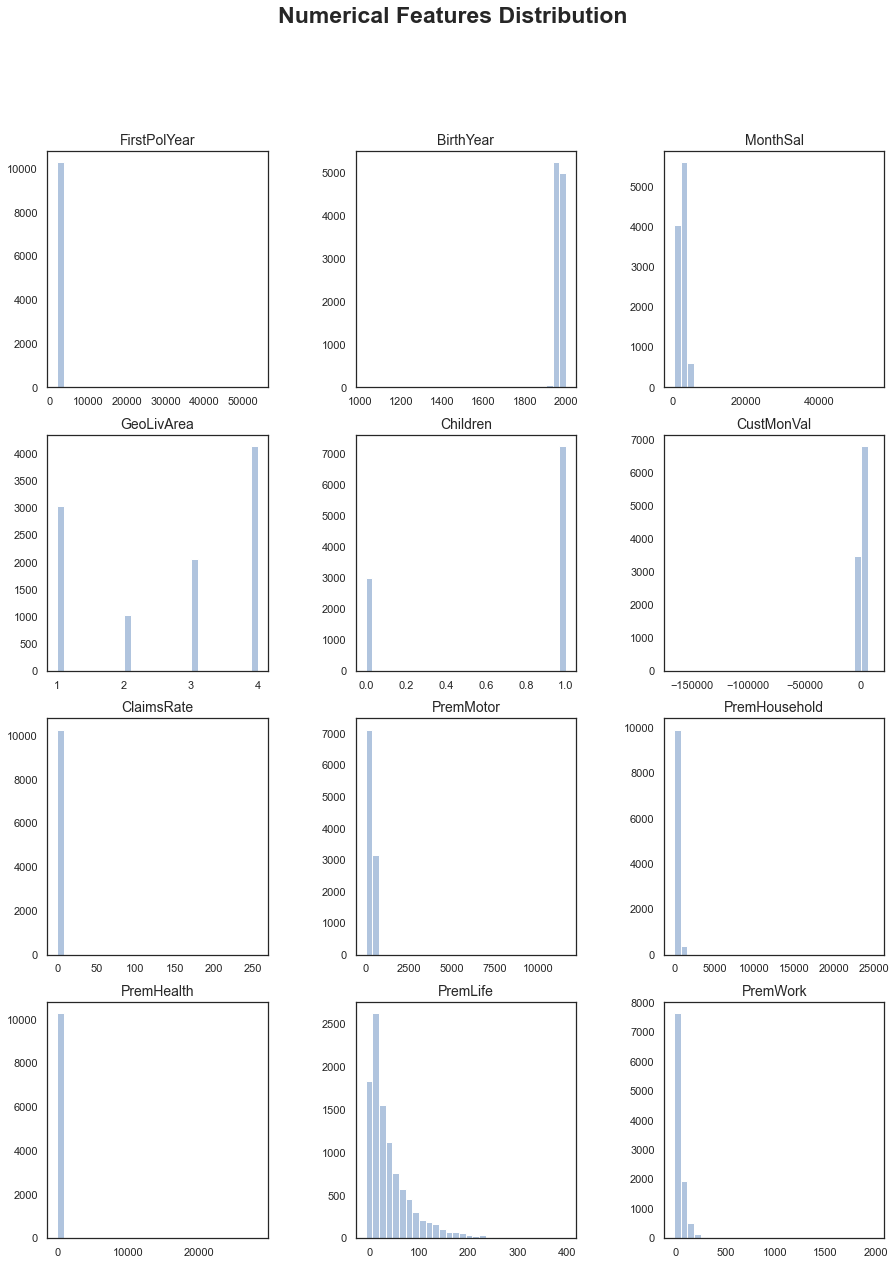

In [23]:
# All numeric features in one figure
sns.set_theme(style = 'white', palette = None)

# Selecting numeric features
numerical = df.select_dtypes(include = ['float64', 'int64']).columns
        
# Plot
fig, axes = plt.subplots(nrows = 4, ncols = ceil(len(numerical)/4) , figsize = (15,20))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, col in zip(axes.flatten(), numerical): # Notice the zip() function and flatten() method
    ax.hist(df[col], bins=30, color = 'lightsteelblue')
    ax.set_title(col.replace('_', ' '), y = 1, fontsize=14)
    
# Layout
plt.suptitle('Numerical Features Distribution', fontsize = 23, fontweight = 'bold')
plt.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = 0.4, hspace = None) 

plt.show()

Corrigir __FirstPolYear__ and __BirthYear__

In [24]:
df.loc[df['BirthYear']<1900, 'BirthYear'] = df['BirthYear'].median()
df.loc[df['FirstPolYear']>2016, 'FirstPolYear'] = df['FirstPolYear'].median()

In [25]:
df.describe()

,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000
mean,1986.017172,1968.098815,2506.483780,2.709848,0.706857,177.892605,0.742772,300.671206,210.431192,171.623728,41.623736,41.149226
std,6.604300,17.386310,1156.118108,1.266230,0.455063,1945.811505,2.916964,211.655390,352.595984,295.806851,47.349596,51.375886
min,1974.000000,1935.000000,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,1980.000000,1953.000000,1706.750000,1.000000,0.000000,-9.440000,0.390000,191.260000,49.450000,111.910000,9.890000,10.670000
50%,1986.000000,1968.000000,2500.500000,3.000000,1.000000,186.870000,0.720000,299.280000,132.800000,162.920000,25.450000,25.670000
75%,1992.000000,1983.000000,3290.000000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.235000,57.010000,56.120000
max,1998.000000,2001.000000,55215.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


In [26]:
df.isna().sum()

FirstPolYear     0
BirthYear        0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64